# Prediccion del Premios de Peliculas


### Intergrantes: 
    - Laura Andrea Martinez
    - Rafael Figueredo


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

In [2]:
#Lectura de archivo

In [3]:
df = pd.read_csv("movies.csv")

In [4]:
df.head()

,year,movie,movie_id,certificate,duration,genre,rate,metascore,synopsis,votes,...,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,tt0035423,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,...,0,NaN,0,NaN,0,NaN,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,tt0120630,G,84,Animation|Adventure|Comedy,7.0,88.0,When a cockerel apparently flies into a chicke...,144475,...,1,Best Animated Film,1,Best Animation,1,Best Animation,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,tt0120667,PG-13,106,Action|Adventure|Family,5.7,40.0,A group of astronauts gain superpowers after a...,273203,...,0,NaN,0,NaN,0,NaN,2005.0,7.0,8.0,5.0
3,2002,Frida,tt0120679,R,123,Biography|Drama|Romance,7.4,61.0,"A biography of artist Frida Kahlo, who channel...",63852,...,0,NaN,0,NaN,0,NaN,2002.0,11.0,22.0,5.0
4,2001,The Lord of the Rings: The Fellowship of the Ring,tt0120737,PG-13,178,Adventure|Drama|Fantasy,8.8,92.0,A meek Hobbit from the Shire and eight compani...,1286275,...,0,NaN,1,Best Music,2,Best Production Design|Best Music,2001.0,12.0,19.0,3.0


In [5]:
df.describe()

,year,duration,rate,metascore,votes,gross,user_reviews,critic_reviews,popularity,awards_wins,...,Boston_Society_of_Film_Critics_won,Boston_Society_of_Film_Critics_nominated,New_York_Film_Critics_Circle_won,New_York_Film_Critics_Circle_nominated,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_nominated,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
count,1345.000000,1345.000000,1345.000000,1274.000000,1.345000e+03,1.217000e+03,1331.000000,1335.000000,1183.000000,1345.000000,...,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,2009.489963,113.043123,7.086840,64.918367,1.761642e+05,8.605192e+07,579.223140,256.711610,1221.697380,3.036431,...,0.171747,0.328625,0.147212,0.294424,0.185130,0.336803,2009.360062,6.834233,15.966076,4.664611
std,5.882285,26.097253,0.813409,16.979714,1.884111e+05,1.044538e+08,700.307986,149.859664,1036.791952,6.391099,...,0.599681,0.915617,0.506544,0.806137,0.572759,0.893274,5.729152,3.710113,8.314168,0.828274
min,2000.000000,6.000000,2.400000,9.000000,3.000000e+01,1.207000e+03,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,1.000000,1.000000,1.000000
25%,2004.000000,100.000000,6.600000,52.000000,4.702500e+04,1.417000e+07,200.000000,152.000000,422.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000,3.000000,9.000000,5.000000
50%,2009.000000,113.000000,7.200000,67.000000,1.144940e+05,5.143000e+07,395.000000,230.000000,999.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,7.000000,16.000000,5.000000
75%,2014.000000,127.000000,7.700000,79.000000,2.472070e+05,1.192200e+08,702.500000,339.500000,1729.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,10.000000,23.000000,5.000000
max,2020.000000,224.000000,9.000000,100.000000,1.743331e+06,9.366300e+08,9253.000000,816.000000,4937.000000,49.000000,...,5.000000,8.000000,5.000000,6.000000,5.000000,7.000000,2021.000000,12.000000,31.000000,7.000000


In [6]:
df.shape

(1345, 119)

In [7]:
df.size

160055

In [8]:
# Calcula el porcentaje de valores nulos en cada columna
null_vals = df.isnull().mean()

# Muestra el resultado
print(null_vals)

year                                                         0.000000
movie                                                        0.000000
movie_id                                                     0.000000
certificate                                                  0.038662
duration                                                     0.000000
                                                               ...   
Los_Angeles_Film_Critics_Association_nominated_categories    0.815613
release_date.year                                            0.035688
release_date.month                                           0.035688
release_date.day-of-month                                    0.035688
release_date.day-of-week                                     0.035688
Length: 119, dtype: float64


In [9]:
# Muestra el resultado en formato de porcentaje
null_vals = null_vals * 100
print(null_vals.apply(lambda x: f'{x:.2f}%'))


year                                                          0.00%
movie                                                         0.00%
movie_id                                                      0.00%
certificate                                                   3.87%
duration                                                      0.00%
                                                              ...  
Los_Angeles_Film_Critics_Association_nominated_categories    81.56%
release_date.year                                             3.57%
release_date.month                                            3.57%
release_date.day-of-month                                     3.57%
release_date.day-of-week                                      3.57%
Length: 119, dtype: object


In [10]:
# Eliminamos las columnas que no aportaban información valiosa 

In [11]:
df.drop(inplace = True, columns=['genre','movie_id','certificate','synopsis','Oscar_nominated_categories','Golden_Globes_won_categories','Golden_Globes_nominated_categories','BAFTA_won_categories','BAFTA_nominated_categories','Screen_Actors_Guild_won_categories','Screen_Actors_Guild_nominated_categories','Critics_Choice_won_categories','Directors_Guild_won_categories','Directors_Guild_nominated_categories','Producers_Guild_won_categories','Producers_Guild_nominated_categories','Art_Directors_Guild_won_categories',  'Art_Directors_Guild_nominated_categories','Writers_Guild_won_categories','Writers_Guild_nominated_categories','Costume_Designers_Guild_won_categories','Costume_Designers_Guild_nominated_categories','Online_Film_Television_Association_won_categories','Online_Film_Television_Association_nominated_categories','Online_Film_Critics_Society_won_categories','Online_Film_Critics_Society_nominated_categories' ,'People_Choice_won_categories' ,'People_Choice_nominated_categories', 'London_Critics_Circle_Film_won_categories','London_Critics_Circle_Film_nominated_categories','American_Cinema_Editors_won_categories','American_Cinema_Editors_nominated_categories','Hollywood_Film_won_categories','Hollywood_Film_nominated_categories','Austin_Film_Critics_Association_won_categories','Austin_Film_Critics_Association_nominated_categories','Denver_Film_Critics_Society_won_categories', 'Denver_Film_Critics_Society_nominated_categories','Boston_Society_of_Film_Critics_won_categories', 'Boston_Society_of_Film_Critics_nominated_categories', 'New_York_Film_Critics_Circle_won_categories', 'New_York_Film_Critics_Circle_nominated_categories','Los_Angeles_Film_Critics_Association_won_categories', 'Los_Angeles_Film_Critics_Association_nominated_categories','release_date','Critics_Choice_nominated_categories'])

In [12]:
df.head(3)

,year,movie,duration,rate,metascore,votes,gross,user_reviews,critic_reviews,popularity,...,Boston_Society_of_Film_Critics_won,Boston_Society_of_Film_Critics_nominated,New_York_Film_Critics_Circle_won,New_York_Film_Critics_Circle_nominated,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_nominated,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,118,6.4,44.0,66660,47100000.0,318.0,125.0,2363.0,...,0,0,0,0,0,0,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,84,7.0,88.0,144475,106790000.0,361.0,186.0,2859.0,...,0,0,1,1,1,1,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,106,5.7,40.0,273203,154700000.0,1008.0,278.0,1876.0,...,0,0,0,0,0,0,2005.0,7.0,8.0,5.0


In [13]:
# Realizamos una matriz de correlación para analizar las columnas que se encuentran con mayor relación y de esta manera llenar los datos vacios con la mediana 

In [14]:
corr = df.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

In [15]:
#En las siguientes lineas de códigos evaluamos los datos faltantes,y por medio de una descripción estadisitica donde la media 
#no se afectara reemplazamos valores, para que de esta manera no perdieda valores

In [16]:
df['metascore'].fillna(df['metascore'].mean(), inplace=True)

In [17]:
df['gross'].fillna(df['gross'].mean(), inplace=True)

In [18]:
df['user_reviews'].fillna(df['user_reviews'].mean(), inplace=True)

In [19]:
df['critic_reviews'].fillna(df['critic_reviews'].mean(), inplace=True)

In [20]:
df['popularity'].fillna(df['popularity'].mean(), inplace=True)

In [21]:
df['release_date.month'].fillna(df['release_date.month'].mean(), inplace=True)

In [22]:
df['release_date.day-of-month'].fillna(df['release_date.day-of-month'].mean(), inplace=True)

In [23]:
df['release_date.day-of-week'].fillna(df['release_date.day-of-week'].mean(), inplace=True)

In [24]:
df['release_date.year'].fillna(df['release_date.year'].mean(), inplace=True)

In [25]:
df = df.dropna()

In [26]:
df

,year,movie,duration,rate,metascore,votes,gross,user_reviews,critic_reviews,popularity,...,Boston_Society_of_Film_Critics_won,Boston_Society_of_Film_Critics_nominated,New_York_Film_Critics_Circle_won,New_York_Film_Critics_Circle_nominated,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_nominated,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,118,6.4,44.0,66660,4.710000e+07,318.0,125.0,2363.0,...,0,0,0,0,0,0,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,84,7.0,88.0,144475,1.067900e+08,361.0,186.0,2859.0,...,0,0,1,1,1,1,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,106,5.7,40.0,273203,1.547000e+08,1008.0,278.0,1876.0,...,0,0,0,0,0,0,2005.0,7.0,8.0,5.0
3,2002,Frida,123,7.4,61.0,63852,2.578000e+07,272.0,126.0,2508.0,...,0,0,0,0,0,0,2002.0,11.0,22.0,5.0
4,2001,The Lord of the Rings: The Fellowship of the Ring,178,8.8,92.0,1286275,3.138400e+08,5078.0,296.0,204.0,...,0,1,0,0,1,2,2001.0,12.0,19.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,2020,Promising Young Woman,113,7.5,73.0,71016,1.194238e+07,699.0,634.0,16.0,...,0,0,0,0,2,2,2020.0,12.0,25.0,5.0
1341,2020,Nomadland,107,7.5,93.0,54049,5.035944e+06,501.0,276.0,26.0,...,3,4,1,1,1,3,2021.0,2.0,19.0,5.0
1342,2020,Da 5 Bloods,154,6.5,82.0,43723,8.605192e+07,819.0,257.0,632.0,...,0,0,2,2,0,0,2020.0,6.0,12.0,5.0
1343,2020,Judas and the Black Messiah,126,7.6,85.0,35916,6.000022e+06,260.0,215.0,44.0,...,0,0,0,0,0,0,2021.0,2.0,12.0,5.0


In [27]:
#Analizamos la columna objetivos que se llama 

In [28]:
df["awards_wins"].max()

49

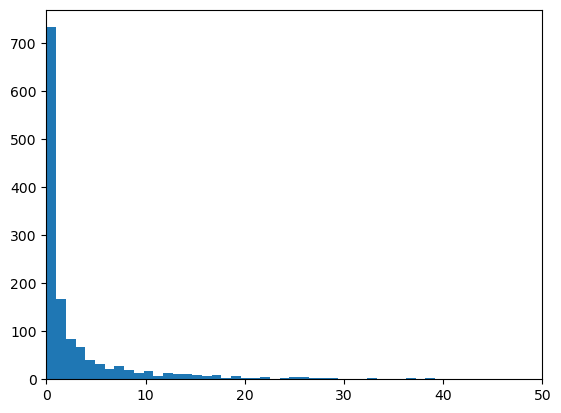

In [29]:

plt.hist(df["awards_wins"], bins=50)

# establece el rango de los valores de x (columna) en el histograma
plt.xlim(0, 50)
plt.show()

In [30]:
df["awards_wins_target"] = df["awards_wins"].apply(lambda x: 'No awards_wins' if x == 0 else 'Yes awards_wins')

In [31]:
# Selecciona las columnas categóricas
df_cat = df.select_dtypes(include=['object'])

# Selecciona las columnas numéricas
df_num = df.select_dtypes(exclude=['object'])

In [32]:
df_dummies = pd.get_dummies(df_cat)

df_dummies.head(3)

,movie_10 Cloverfield Lane,movie_102 Dalmatians,movie_12,movie_12 Years a Slave,movie_127 Hours,movie_13 Hours,movie_17 Again,movie_1917,movie_2 Fast 2 Furious,movie_2012,...,Oscar_Best_AdaScreen_won_No,Oscar_Best_AdaScreen_won_Yes,Oscar_Best_AdaScreen_nominated_No,Oscar_Best_AdaScreen_nominated_Yes,Oscar_Best_OriScreen_won_No,Oscar_Best_OriScreen_won_Yes,Oscar_Best_OriScreen_nominated_No,Oscar_Best_OriScreen_nominated_Yes,awards_wins_target_No awards_wins,awards_wins_target_Yes awards_wins
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [33]:
var_obj = df[["awards_wins_target"]]

In [34]:
df_cat = df_cat.drop(["awards_wins_target"], axis=1)

In [35]:
df_final = pd.concat([df_num, df_dummies, var_obj], axis=1)

In [36]:
df_final

,year,duration,rate,metascore,votes,gross,user_reviews,critic_reviews,popularity,awards_wins,...,Oscar_Best_AdaScreen_won_Yes,Oscar_Best_AdaScreen_nominated_No,Oscar_Best_AdaScreen_nominated_Yes,Oscar_Best_OriScreen_won_No,Oscar_Best_OriScreen_won_Yes,Oscar_Best_OriScreen_nominated_No,Oscar_Best_OriScreen_nominated_Yes,awards_wins_target_No awards_wins,awards_wins_target_Yes awards_wins,awards_wins_target
0,2001,118,6.4,44.0,66660,4.710000e+07,318.0,125.0,2363.0,1,...,0,1,0,1,0,1,0,0,1,Yes awards_wins
1,2000,84,7.0,88.0,144475,1.067900e+08,361.0,186.0,2859.0,5,...,0,1,0,1,0,1,0,0,1,Yes awards_wins
2,2005,106,5.7,40.0,273203,1.547000e+08,1008.0,278.0,1876.0,0,...,0,1,0,1,0,1,0,1,0,No awards_wins
3,2002,123,7.4,61.0,63852,2.578000e+07,272.0,126.0,2508.0,2,...,0,1,0,1,0,1,0,0,1,Yes awards_wins
4,2001,178,8.8,92.0,1286275,3.138400e+08,5078.0,296.0,204.0,26,...,0,0,1,1,0,1,0,0,1,Yes awards_wins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,2020,113,7.5,73.0,71016,1.194238e+07,699.0,634.0,16.0,22,...,0,1,0,1,0,0,1,0,1,Yes awards_wins
1341,2020,107,7.5,93.0,54049,5.035944e+06,501.0,276.0,26.0,33,...,0,0,1,1,0,1,0,0,1,Yes awards_wins
1342,2020,154,6.5,82.0,43723,8.605192e+07,819.0,257.0,632.0,4,...,0,1,0,1,0,1,0,0,1,Yes awards_wins
1343,2020,126,7.6,85.0,35916,6.000022e+06,260.0,215.0,44.0,6,...,0,1,0,1,0,0,1,0,1,Yes awards_wins


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:

# Separamos los datos en dos matrices: una para las variables de entrada (X) y otra para la variable de salida (y)
X = df_final.drop(["awards_wins_target"], axis = 1 )
y = df_final[["awards_wins_target"]]


In [39]:

# Dividimos el conjunto de datos en dos partes: entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [40]:
# Creamos el modelo de regresión logística
model = LogisticRegression()

In [41]:

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [42]:
# Calcular la precisión del modelo sobre el conjunto de pruebas
precision = model.score(X_test, y_test)

# Imprimir la precisión
print(precision)

0.5278810408921933


In [43]:
from sklearn.metrics import classification_report

# Hacer predicciones sobre el conjunto de pruebas
y_pred = model.predict(X_test)


# Imprimir un informe de clasificación con las métricas relevantes
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

 No awards_wins       0.61      0.27      0.37       141
Yes awards_wins       0.50      0.81      0.62       128

       accuracy                           0.53       269
      macro avg       0.56      0.54      0.50       269
   weighted avg       0.56      0.53      0.49       269



In [44]:
report = classification_report(y_test, y_pred, output_dict=True)
report_lr = report['Yes awards_wins']
df_classification_report_lr = pd.DataFrame(data=report_lr.items(), columns=["metrics", "Logistic Regression"])
df_classification_report_lr.set_index('metrics', inplace=True)
df_classification_report_lr.drop(['support'], inplace=True)
display(df_classification_report_lr)

,Logistic Regression
metrics,
precision,0.502415
recall,0.812500
f1-score,0.620896


In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
# Separamos los datos en dos matrices: una para las variables de entrada (X) y otra para la variable de salida (y)
X_nb = df_final.drop(["awards_wins_target"], axis = 1 )
y_nb = df_final[["awards_wins_target"]]


In [47]:

# Dividimos el conjunto de datos en dos partes: entrenamiento y prueba
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2)


In [48]:
# Creamos el modelo de regresión logística
naive_model = MultinomialNB()

In [49]:
# Entrenar el modelo con los datos de entrenamiento
naive_model.fit(X_train_nb, y_train_nb.values.ravel())


MultinomialNB()

In [50]:
from sklearn.metrics import classification_report

# Hacer predicciones sobre el conjunto de pruebas
y_pred_naive_bayes = naive_model.predict(X_test_nb)

precision_nb = naive_model.score(X_test_nb,  y_test_nb)

# Imprimir la precisión de la hipotesis nula
print(f'precision {precision_nb:.2f}')


# Imprimir un informe de clasificación con las métricas relevantes
print(classification_report(y_test_nb, y_pred_naive_bayes))

precision 0.52
                 precision    recall  f1-score   support

 No awards_wins       0.55      0.50      0.52       143
Yes awards_wins       0.49      0.55      0.52       126

       accuracy                           0.52       269
      macro avg       0.52      0.52      0.52       269
   weighted avg       0.52      0.52      0.52       269



In [51]:

report = classification_report(y_test_nb, y_pred_naive_bayes, output_dict=True)
report_nb = report['Yes awards_wins']
df_classification_report_nb = pd.DataFrame(data=report_nb.items(), columns=["metrics", "Naive Bayes"])
df_classification_report_nb.set_index('metrics', inplace=True)
df_classification_report_nb.drop(['support'], inplace=True)
display(df_classification_report_nb)

,Naive Bayes
metrics,
precision,0.489362
recall,0.547619
f1-score,0.516854


In [52]:
from sklearn.metrics import  accuracy_score

accuracy_model = accuracy_score(y_test, y_pred)

accuracy_nb = accuracy_score(y_test_nb, y_pred_naive_bayes)



df_report_final = pd.merge(df_classification_report_nb, df_classification_report_lr, left_index=True, right_index=True)
df_report_final = df_report_final.append(pd.Series({'Naive Bayes':accuracy_nb , 'Logistic Regression':accuracy_model},name='accuracy'))
df_report_final.reset_index(inplace=True)
display(df_report_final)

,metrics,Naive Bayes,Logistic Regression
0,precision,0.489362,0.502415
1,recall,0.547619,0.812500
2,f1-score,0.516854,0.620896
3,accuracy,0.520446,0.527881


<AxesSubplot:xlabel='metrics'>

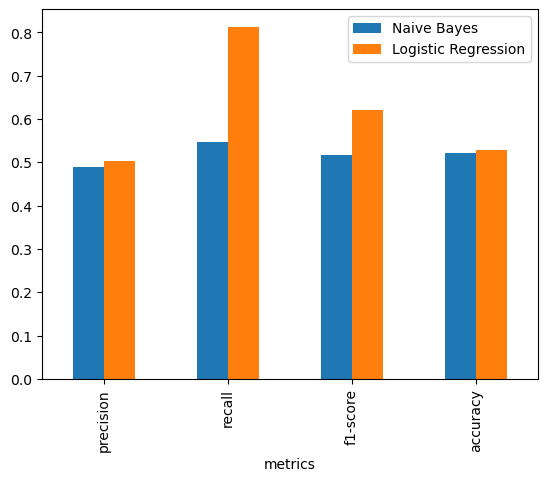

In [53]:
df_report_final.plot(x="metrics", y=["Naive Bayes", "Logistic Regression"], kind="bar")
